## Importing the Libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import shap

## Reading the Data

In [355]:
df=pd.read_csv(r"airbnb_nyc_clean.csv")

In [356]:
df

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.00000,193.000000,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.00000,28.000000,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.00000,124.000000,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.00000,74.000000,13.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.00000,41.000000,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69300,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,blank,Brooklyn,Bushwick,40.69370,-73.91006,True,flexible,Private room,2016.0,624.73607,124.894026,5.0,3.0,2018-04-09,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...
69301,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,unconfirmed,blank,Brooklyn,Williamsburg,40.71284,-73.96284,False,moderate,Private room,2005.0,624.73607,124.894026,7.0,15.0,2018-01-01,0.55,4.0,1.0,0.0,blank
69302,57362446,Your 1 bedroom home away from home!,95572379802,verified,blank,Manhattan,Upper West Side,40.79563,-73.97634,True,flexible,Entire home/apt,2010.0,624.73607,124.894026,3.0,38.0,2019-06-10,1.40,3.0,1.0,31.0,blank
69303,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,blank,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,strict,Entire home/apt,2020.0,624.73607,124.894026,1.0,81.0,2019-03-05,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...


## EDA


In [297]:
df.shape

(69305, 23)

#### Data has 23 columns and 69305 rows

In [298]:
pd.set_option("display.max_columns",None)

In [299]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,13.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [300]:
df.drop(['id','host_id'],axis=1).describe()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000
mean,40.728070,-73.949036,2012.489503,624.736070,124.894026,4.620330,28.003896,1.301503,3.321636,8.976755,153.184287
std,0.055973,0.050470,5.756144,331.158937,66.222794,4.356887,52.035180,1.659188,1.255746,34.808447,134.421373
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,0.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688540,-73.982790,2008.000000,339.000000,68.000000,2.000000,1.000000,0.300000,2.000000,1.000000,18.000000
50%,40.722650,-73.954390,2012.000000,624.736070,124.894026,3.000000,7.000000,0.790000,3.000000,1.000000,127.000000
75%,40.762730,-73.931380,2017.000000,911.000000,182.000000,6.000000,30.000000,1.730000,4.000000,3.000000,281.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,13.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


#### On average the price is 624 (Max 1200 and min 50)
#### service fee cost around 125 
#### on average, property is built in 2012 

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  construction_year               

### data is clean

In [302]:
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64


##### NO NULL values foundlist=df.columns.values.tolist()

### understanding the unique values in dataset

In [303]:
list=df.drop(['id','name','host_id','host_name','lat','long','price','service_fee','number_of_reviews','house_rules','availability_365'],axis=1).columns.values.tolist()
#understanding the unique values in dataset
for i in list:
    print(i)
    print(df[i].unique())

host_identity_verified
['unconfirmed' 'verified']
neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason 

#### some variables are categorical objects which we will later replace with label encoding

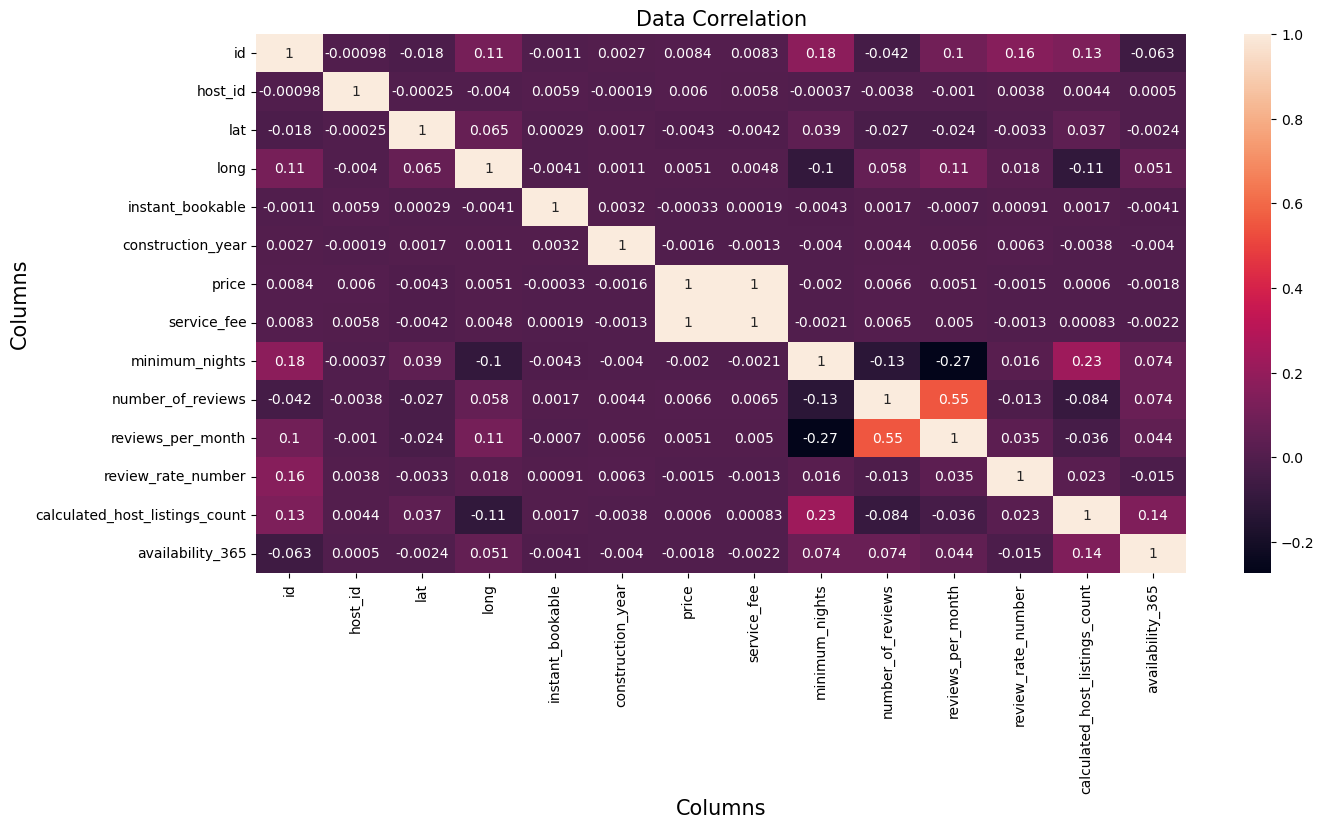

In [304]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

#### There is not a high corerattion between the numerical columns it means we do not have to drop too many columns


In [361]:
df.drop(['id','host_name'],axis=1,inplace=True)

#### droped the host_name and id as it is irrevelant  

### Univariate Analysis

In [306]:
cols=df.columns

In [307]:
cols

Index(['name', 'host_id', 'host_identity_verified', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'house_rules'],
      dtype='object')

In [308]:
l=df.host_id.unique()

In [309]:
len(l)

69304

In [360]:
df.drop(['host_id'],axis=1,inplace=True)

#### Each host_id is different in each row it means we can drop this columns as well

<AxesSubplot:xlabel='host_identity_verified', ylabel='count'>

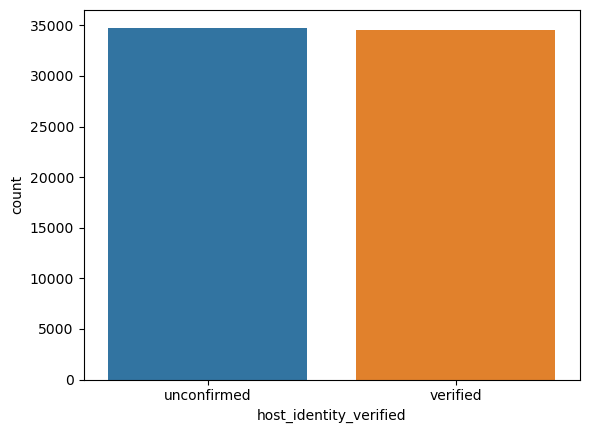

In [311]:
sns.countplot(x = 'host_identity_verified', data = df)

#### Almost equal number of verifies and uncomfirmed properties

In [312]:
numerical_df= df.select_dtypes(exclude = ['object','bool'])
categorical_df=df.select_dtypes(include='object')

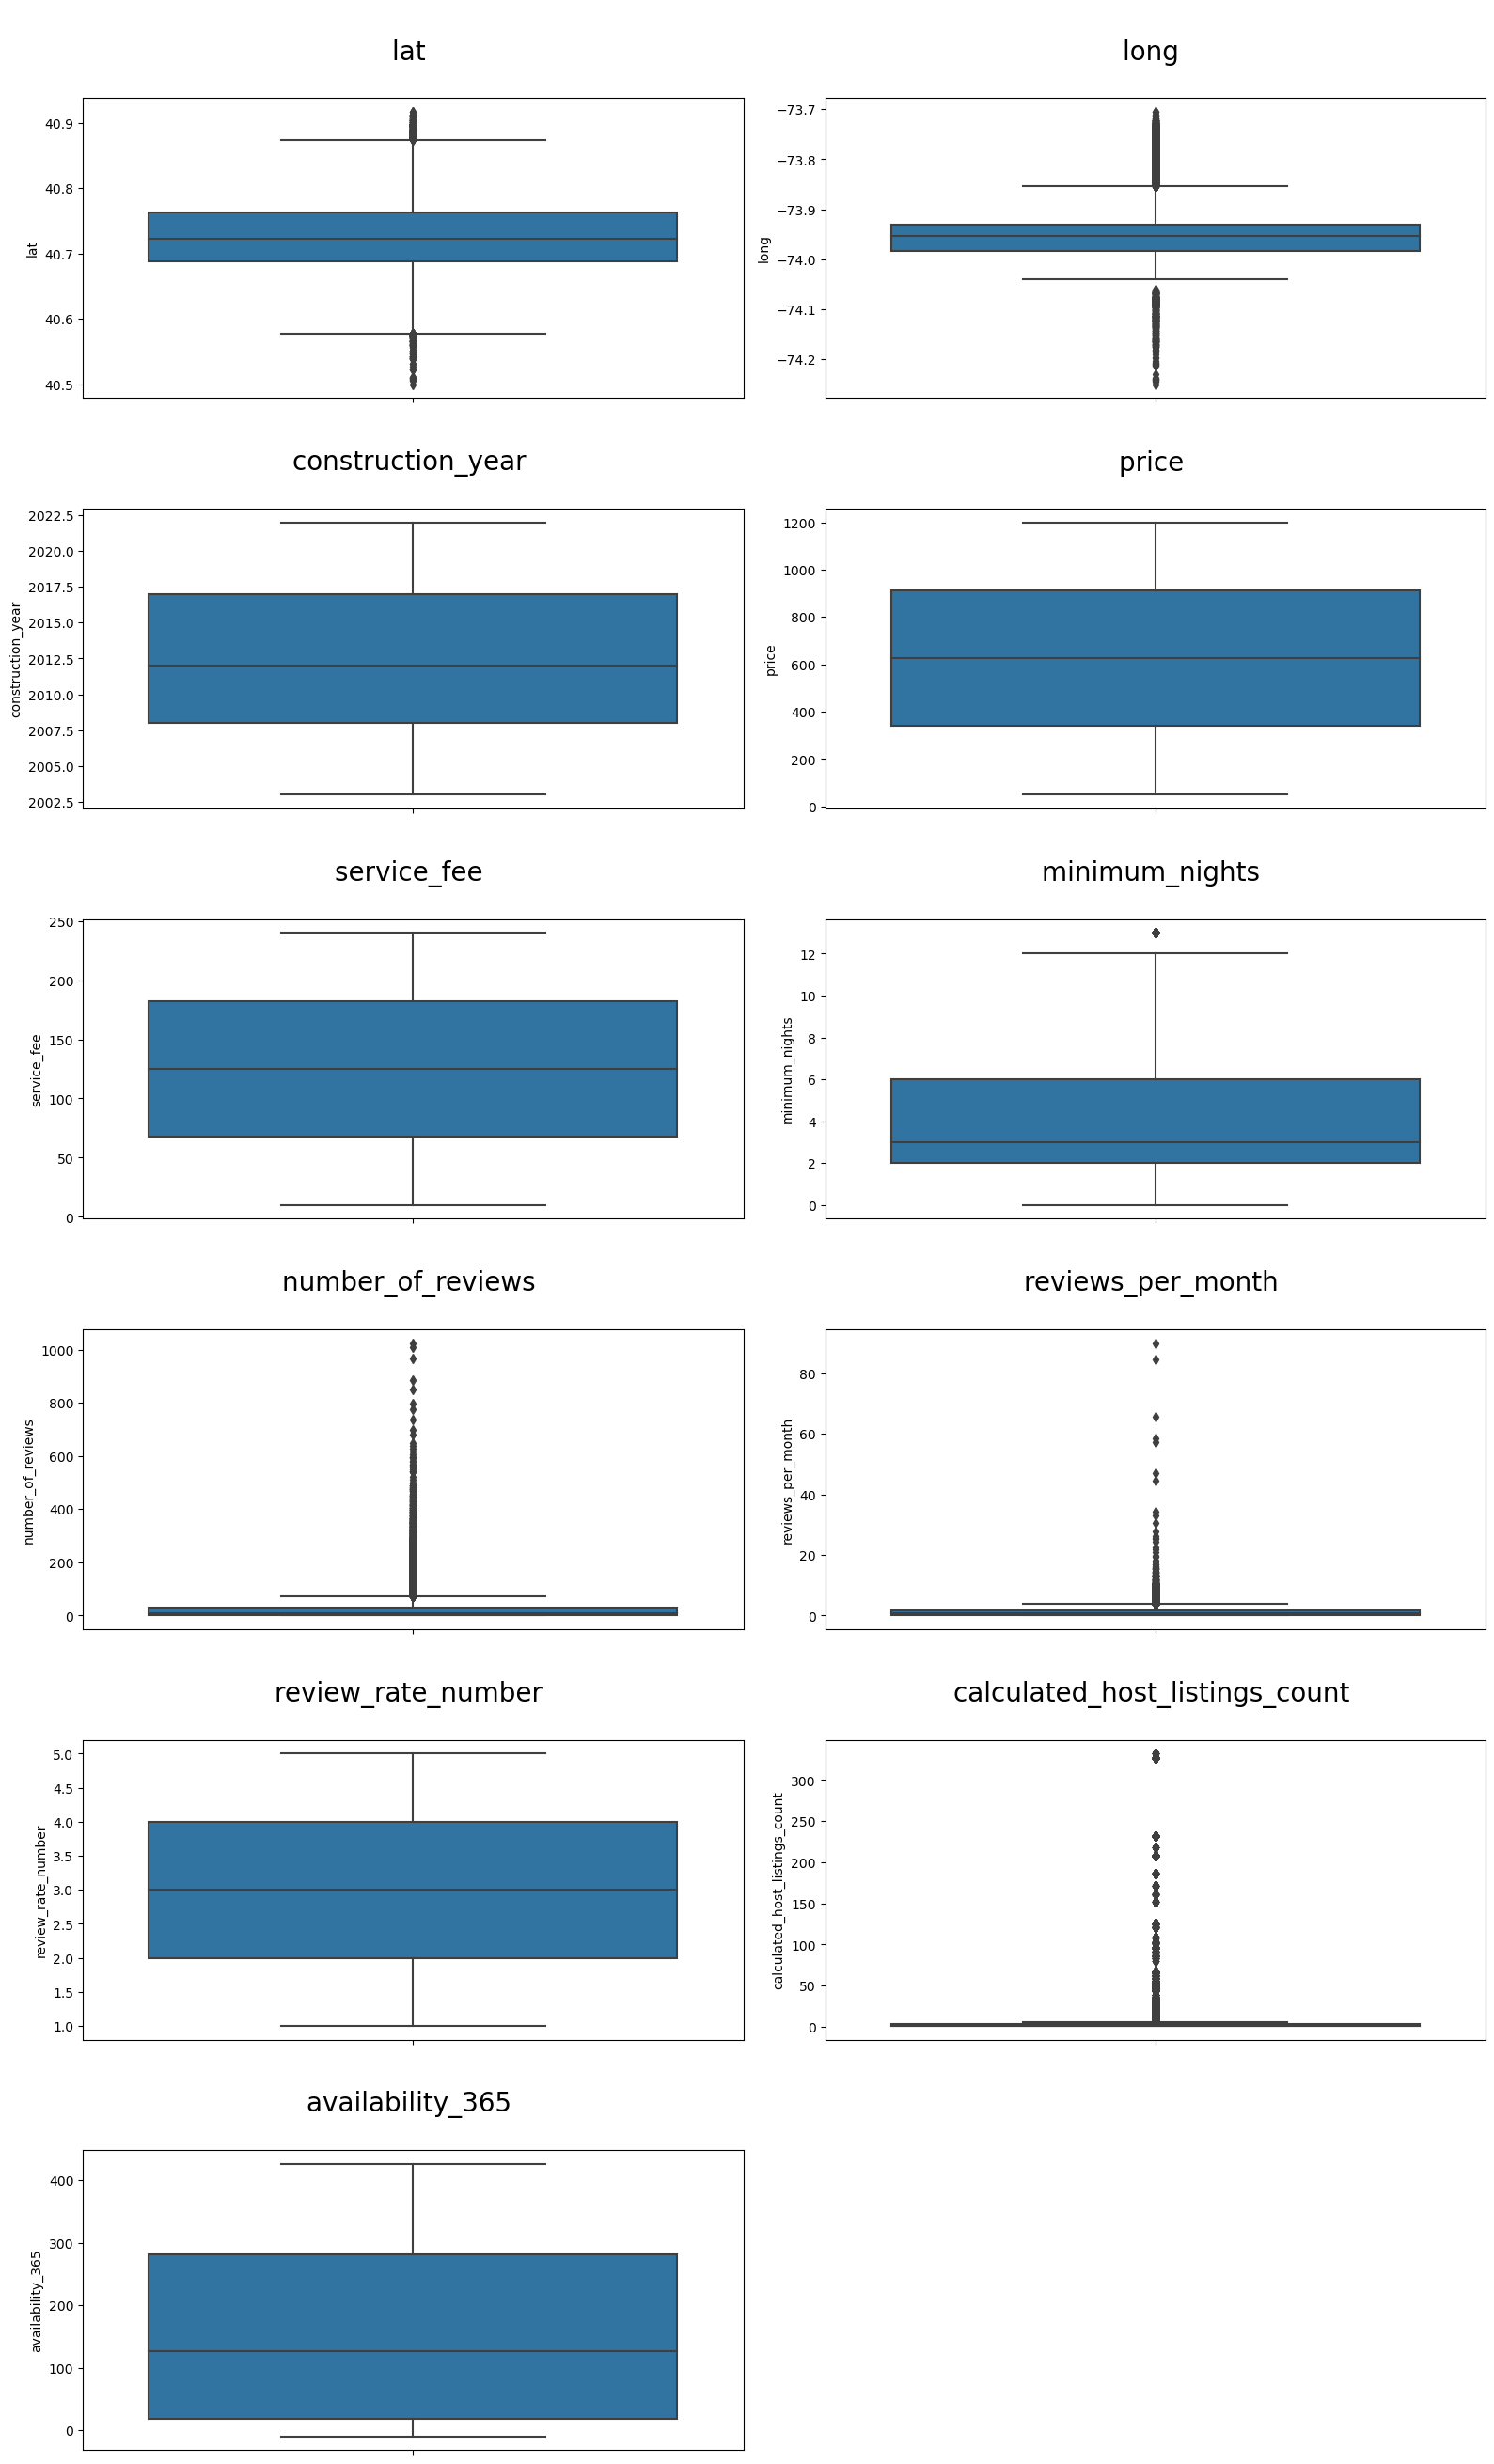

In [313]:
numerical_df= df.select_dtypes(exclude = ['object','bool'])
cols = numerical_df.columns
plt.figure(figsize = (16, 35))
for i in range(len(cols)):
        ax = plt.subplot(8, 2, i+1)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
plt.tight_layout()
plt.show()


### given the nature of latitude and longitude they cannot be termed as outlires.
### the null values in no. of reviews are set to zero which is present in 80% of data. due to this the reviews cannot be taken as outliers

C:\Users\usuma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

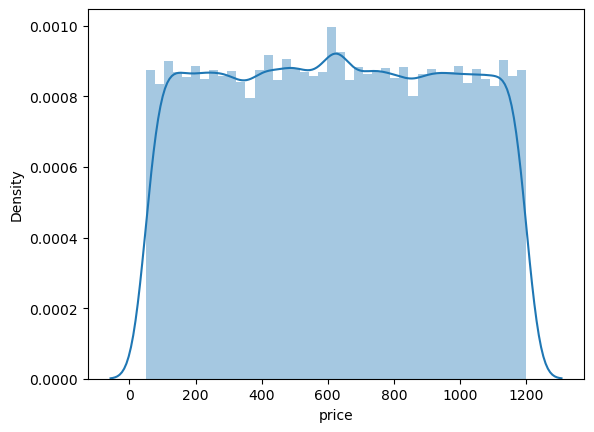

In [314]:
sns.distplot(df['price'])

#### price distribution is very balanced and symmetric

In [315]:
# Global function to make wordcloud infographics
def make_wordcloud(words):

    text = ""
    for word in words:
        text = text + " " + word

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords,colormap="plasma",width=1920, height=1080,max_font_size=200, max_words=200, background_color="white").generate(text)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation="gaussian")
    plt.axis("off")
    plt.show()

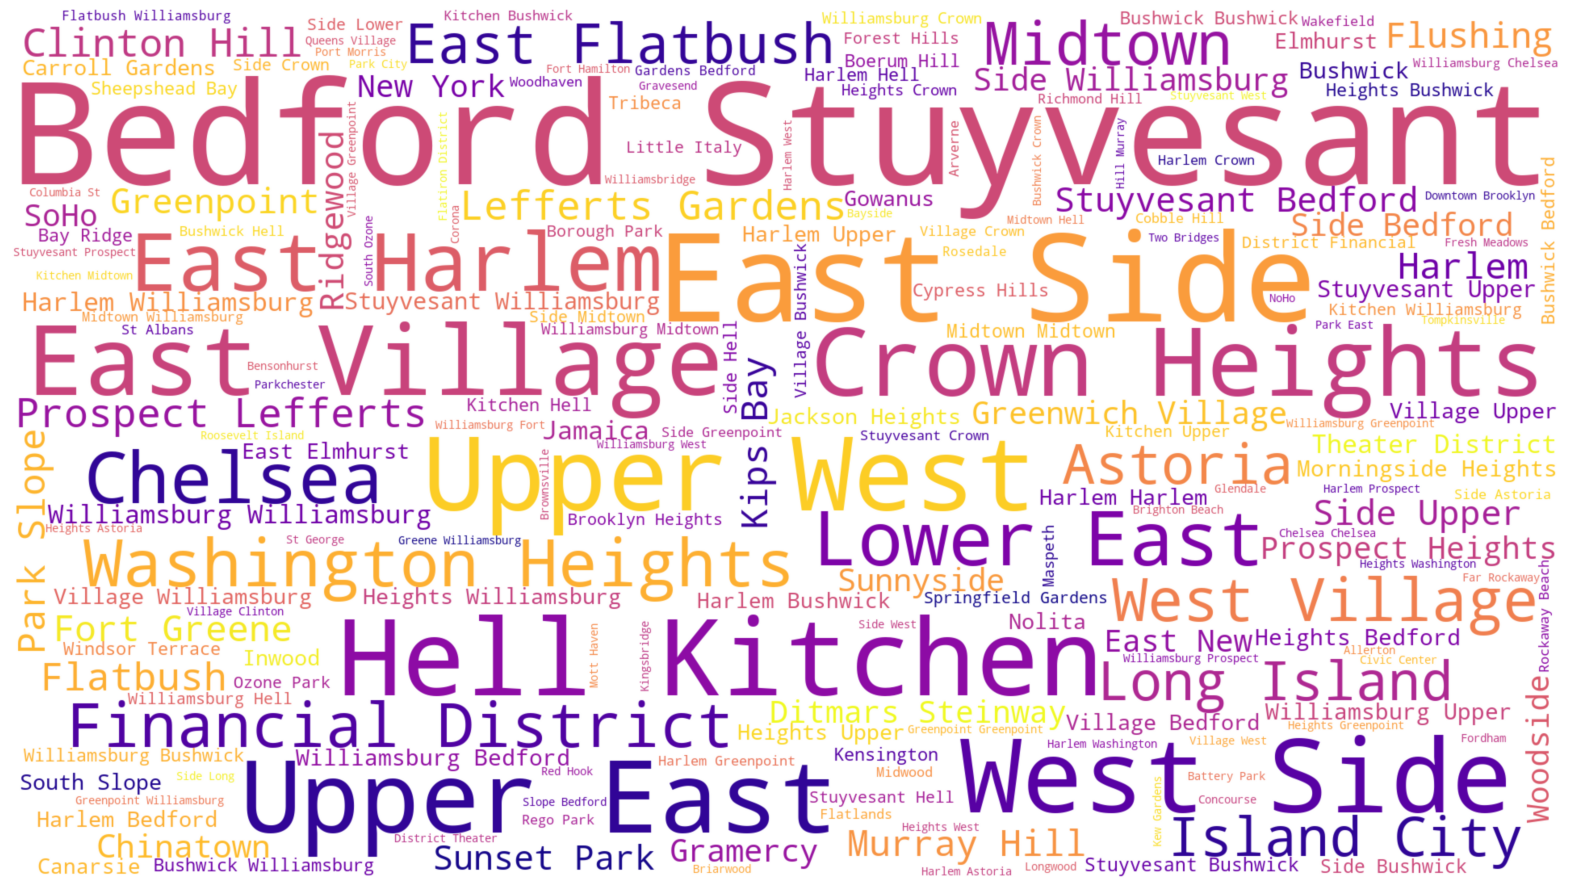

In [316]:
make_wordcloud(df.neighbourhood)

In [320]:
(df.neighbourhood.value_counts().head(20))

Bedford-Stuyvesant    5331
Williamsburg          5079
Harlem                3659
Bushwick              3270
Hell's Kitchen        2817
Upper West Side       2601
Upper East Side       2460
Midtown               2317
East Village          2285
Crown Heights         2173
Chelsea               1558
East Harlem           1550
Greenpoint            1439
Lower East Side       1366
Astoria               1272
Washington Heights    1163
Financial District    1024
West Village           968
Flatbush               852
East Flatbush          833
Name: neighbourhood, dtype: int64

#### neighbourhood column has most of number of entries as Bedford, wiliamsburg, hellkitchen etc

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

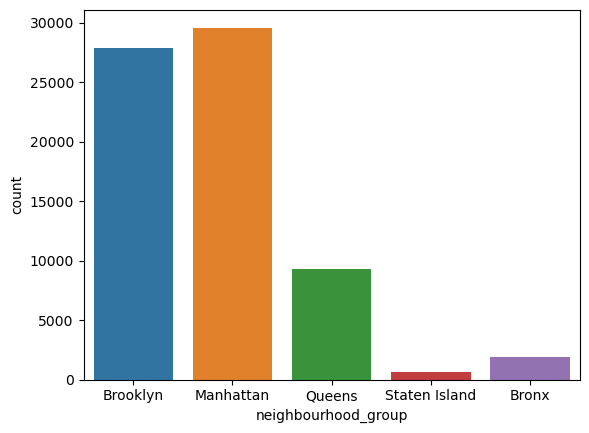

In [317]:
sns.countplot(x = 'neighbourhood_group', data = df)

In [318]:
df.neighbourhood_group.value_counts()

Manhattan        29587
Brooklyn         27895
Queens            9262
Bronx             1912
Staten Island      649
Name: neighbourhood_group, dtype: int64

#### Most of the property are listed in manhatten and Brooklyn

In [319]:
df[df.house_rules!='blank'].house_rules.head(60)

0     Clean up and treat the home the way you'd like...
1     Pet friendly but please confirm with me if the...
2     I encourage you to use my kitchen, cooking and...
4     Please no smoking in the house, porch or on th...
5                     No smoking, please, and no drugs.
6     Please no shoes in the house so bring slippers...
7     House Guidelines for our BnB We are delighted ...
8     - Please clean up after yourself when using th...
9     NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....
11    My ideal guests would be warm, friendly, and r...
12    - One of the bedroom closets is not accessible...
15    Arrival time can be no later than 9:00PM unles...
16    Absolutely no smoking in the building, handlin...
17    - Please be mindful of the neighbors, quiet ti...
19    LAUNDRY - Laundry can be done by the visitor b...
20    No smoking, No pets.  No shoes in the house. V...
21    - No smoking or open flames on the property - ...
22    Arrival time can be no later than 10:00PM.

### Most of the house_rules talks about no pets no smoking and no partying

<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

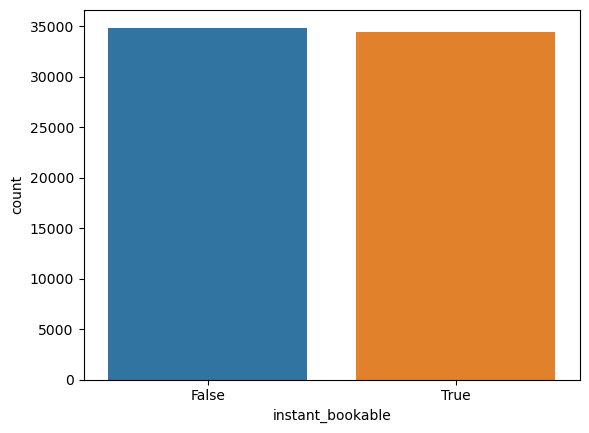

In [321]:
sns.countplot(x = 'instant_bookable', data = df)

#### instan_bookable has almost same number of true and false values

<AxesSubplot:xlabel='cancellation_policy', ylabel='count'>

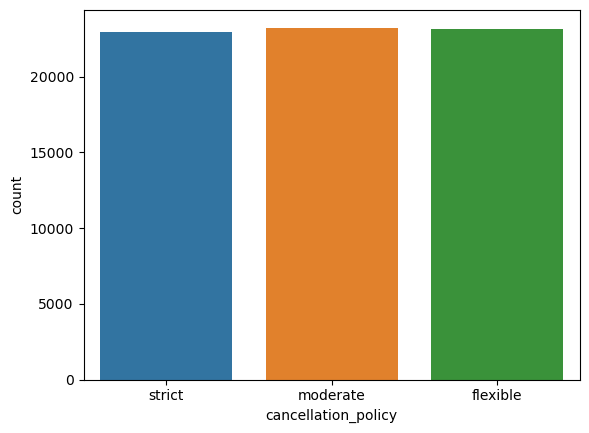

In [322]:
sns.countplot(x = 'cancellation_policy', data = df)

<AxesSubplot:xlabel='room_type', ylabel='count'>

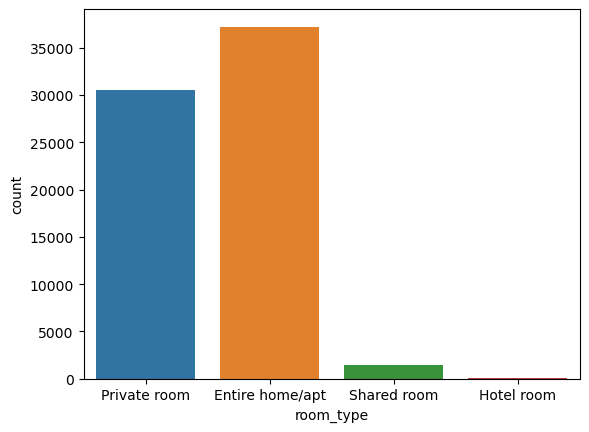

In [323]:
sns.countplot(x = 'room_type', data = df)

In [324]:
df.room_type.value_counts()

Entire home/apt    37212
Private room       30508
Shared room         1470
Hotel room           115
Name: room_type, dtype: int64

#### most listings are of entire home/apt and least of hotel romm

<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

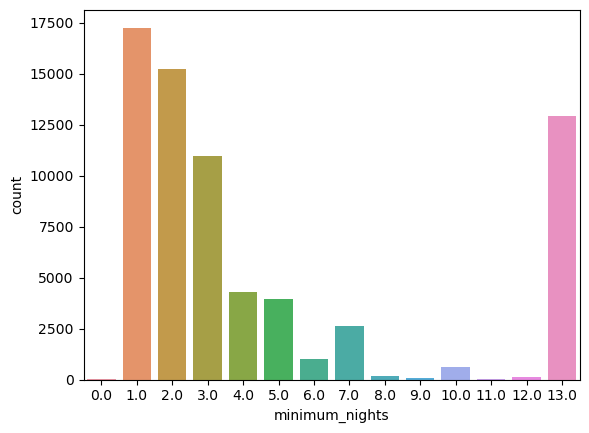

In [325]:
sns.countplot(x='minimum_nights',data=df)

In [326]:
df.minimum_nights.value_counts()

1.0     17257
2.0     15245
13.0    12928
3.0     10937
4.0      4273
5.0      3975
7.0      2634
6.0      1027
10.0      614
8.0       160
12.0      106
9.0        99
11.0       40
0.0        10
Name: minimum_nights, dtype: int64

#### Most of the listings have a minimum stay of 1,2,3 and 13 nights

### 10 listings have zero minimum_nights which we can replace with some average number that is more possible

### Bivariate analysis

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

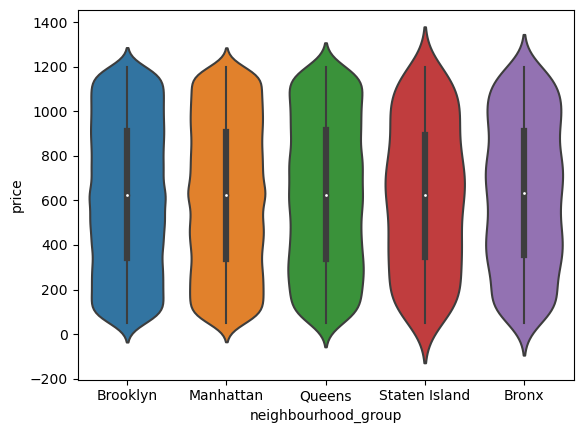

In [327]:
sns.violinplot(x='neighbourhood_group',y='price',data=df)

#### All the neighbourhood group are almost equally dense 

<AxesSubplot:xlabel='room_type', ylabel='price'>

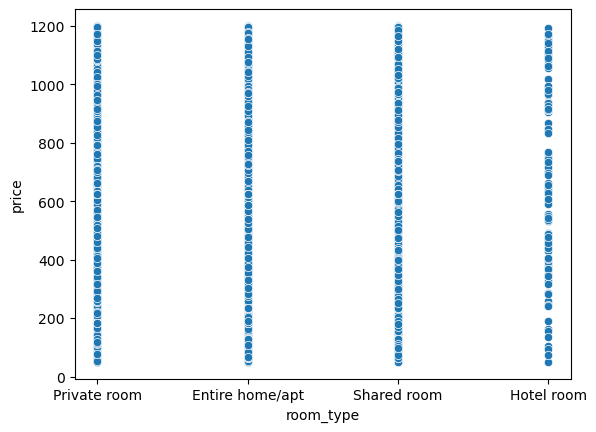

In [328]:
sns.scatterplot(x='room_type',y='price',data=df)

<AxesSubplot:xlabel='instant_bookable', ylabel='price'>

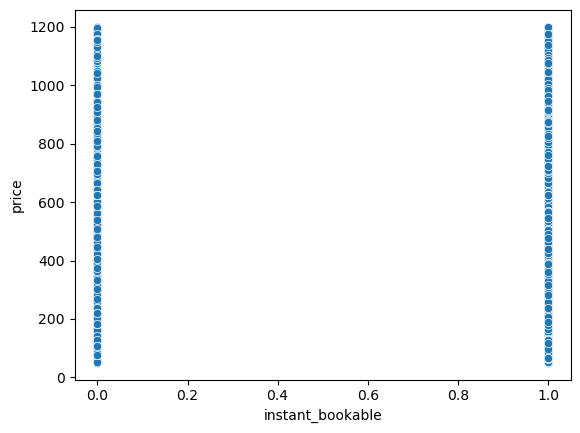

In [329]:
sns.scatterplot(x='instant_bookable',y='price',data=df)

In [330]:
df.instant_bookable.value_counts()

False    34867
True     34438
Name: instant_bookable, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

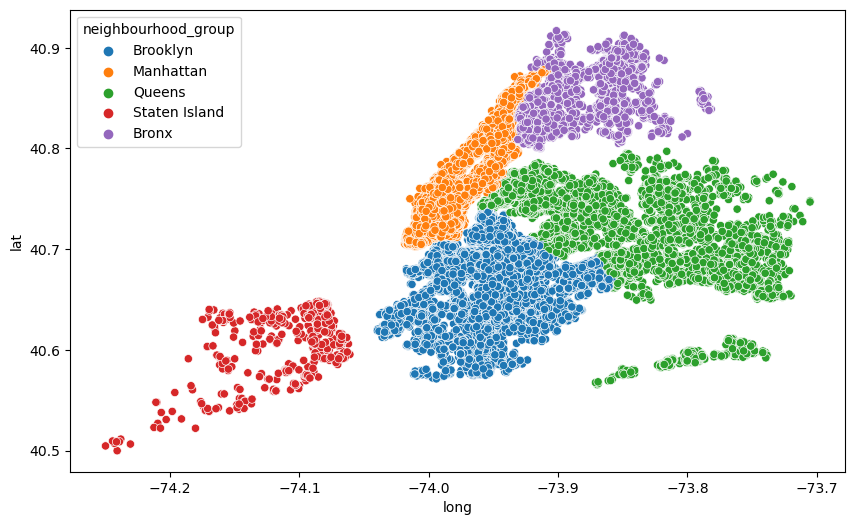

In [331]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.long,y=df.lat,hue=df.neighbourhood_group)

<AxesSubplot:xlabel='room_type', ylabel='availability_365'>

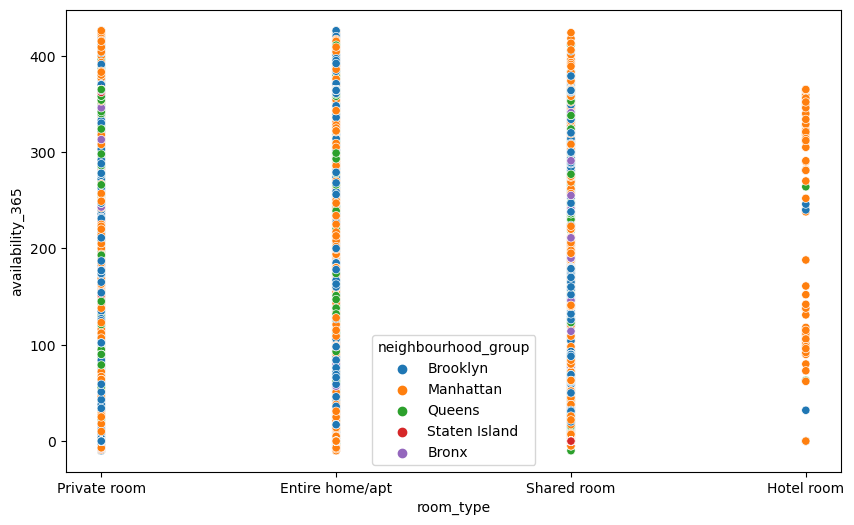

In [332]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.room_type,y=df.availability_365,hue=df.neighbourhood_group)

#### Hotel rooms are mostly available in manhatten 


<AxesSubplot:xlabel='room_type', ylabel='count'>

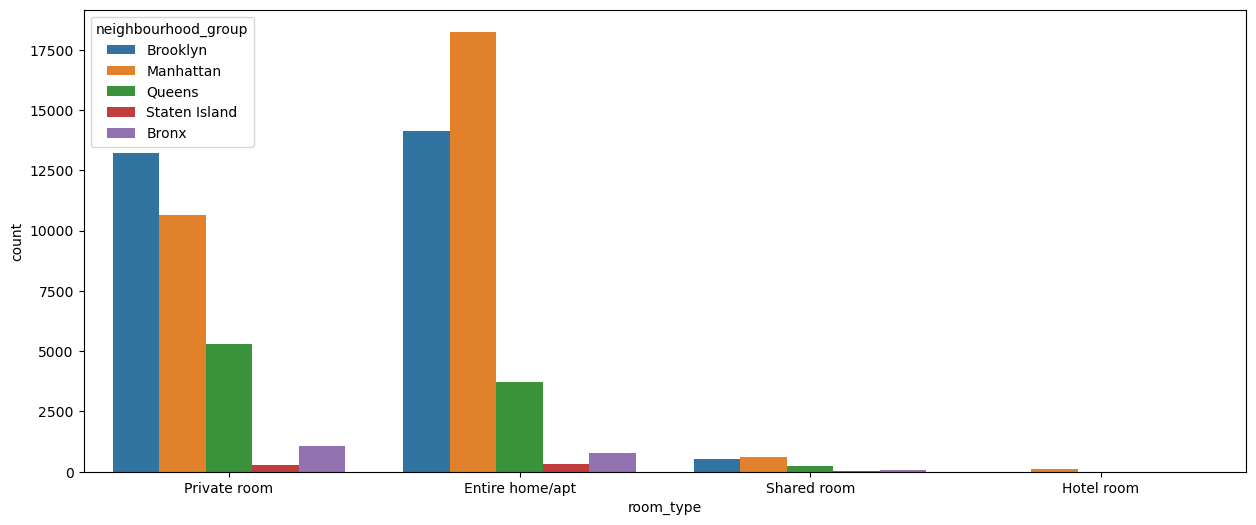

In [333]:
plt.figure(figsize=(15,6))
sns.countplot(x=df.room_type,hue=df.neighbourhood_group)

#### Manhatten has most number of properties as entire home/apt

## Feature enggineering 

In [357]:
df['no_pet'] = df.house_rules.apply(lambda x: 1 if 'no pet' in x.lower() else 0)
df['no_smoking'] = df.house_rules.apply(lambda x: 1 if 'no smoking' in x.lower() else 0)
df['no_party'] = df.house_rules.apply(lambda x: 1 if 'no party' in x.lower() else 0)
df.no_pet.sum(), df.no_smoking.sum(), df.no_party.sum()


(7746, 16240, 773)

In [358]:
df.drop(['name','house_rules','last_review'],axis=1,inplace=True)

In [359]:
df['construction_year']=2023.0-df['construction_year']

In [362]:
df

,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,no_pet,no_smoking,no_party
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,3.0,966.00000,193.000000,10.0,9.0,0.21,4.0,6.0,286.0,0,1,0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,16.0,142.00000,28.000000,13.0,45.0,0.38,4.0,2.0,228.0,0,0,0
2,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,18.0,620.00000,124.000000,3.0,0.0,0.79,5.0,1.0,352.0,0,1,0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,18.0,368.00000,74.000000,13.0,270.0,4.64,4.0,1.0,322.0,0,0,0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,14.0,204.00000,41.000000,10.0,9.0,0.10,3.0,1.0,289.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69300,verified,Brooklyn,Bushwick,40.69370,-73.91006,True,flexible,Private room,7.0,624.73607,124.894026,5.0,3.0,0.11,1.0,1.0,0.0,0,1,0
69301,unconfirmed,Brooklyn,Williamsburg,40.71284,-73.96284,False,moderate,Private room,18.0,624.73607,124.894026,7.0,15.0,0.55,4.0,1.0,0.0,0,0,0
69302,verified,Manhattan,Upper West Side,40.79563,-73.97634,True,flexible,Entire home/apt,13.0,624.73607,124.894026,3.0,38.0,1.40,3.0,1.0,31.0,0,0,0
69303,verified,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,strict,Entire home/apt,3.0,624.73607,124.894026,1.0,81.0,2.96,2.0,2.0,0.0,0,0,0


## Encoding categorical columns

In [368]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['room_type']= label_encoder.fit_transform(df['room_type'])
df['neighbourhood']= label_encoder.fit_transform(df['neighbourhood'])
df['neighbourhood_group']= label_encoder.fit_transform(df['neighbourhood_group'])
df['host_identity_verified']= label_encoder.fit_transform(df['host_identity_verified'])
df['cancellation_policy']= label_encoder.fit_transform(df['cancellation_policy'])

In [363]:
df["instant_bookable"] = df["instant_bookable"].astype(int)

In [404]:
df

,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,no_pet,no_smoking,no_party
0,0,1,123,40.64749,-73.97237,0,2,2,3.0,966.00000,193.000000,10.0,9.0,0.21,4.0,6.0,286.0,0,1,0
1,1,2,144,40.75362,-73.98377,0,1,0,16.0,142.00000,28.000000,13.0,45.0,0.38,4.0,2.0,228.0,0,0,0
2,0,2,108,40.80902,-73.94190,1,0,2,18.0,620.00000,124.000000,3.0,0.0,0.79,5.0,1.0,352.0,0,1,0
3,0,1,47,40.68514,-73.95976,1,1,0,18.0,368.00000,74.000000,13.0,270.0,4.64,4.0,1.0,322.0,0,0,0
4,1,2,70,40.79851,-73.94399,0,1,0,14.0,204.00000,41.000000,10.0,9.0,0.10,3.0,1.0,289.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69300,1,1,32,40.69370,-73.91006,1,0,2,7.0,624.73607,124.894026,5.0,3.0,0.11,1.0,1.0,0.0,0,1,0
69301,0,1,232,40.71284,-73.96284,0,1,2,18.0,624.73607,124.894026,7.0,15.0,0.55,4.0,1.0,0.0,0,0,0
69302,1,2,219,40.79563,-73.97634,1,0,0,13.0,624.73607,124.894026,3.0,38.0,1.40,3.0,1.0,31.0,0,0,0
69303,1,2,109,40.76125,-73.98945,1,2,0,3.0,624.73607,124.894026,1.0,81.0,2.96,2.0,2.0,0.0,0,0,0


### Modelling 

#### Creating x and y variables

In [370]:
X = df.drop('price', axis=1).values
y = df['price'].values
y = np.log10(y)

#### Spiliting the dataset into training and testing

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Linear regression model

In [371]:

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [372]:
r2_score = lr.score(X_test,y_test)
print(r2_score*100,'%')

87.59766695200786 %


In [373]:
metrix = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
metrix.head(10)

,Actual,Predicted
0,775.0,691.0
1,1103.0,1376.0
2,1080.0,1303.0
3,318.0,270.0
4,122.0,178.0
5,385.0,306.0
6,870.0,844.0
7,500.0,391.0
8,300.0,258.0
9,1096.0,1356.0


#### Decision tree model

In [378]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
model1=DTree.fit(X_train,y_train)
y_predict_Dtree=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9911815255589039

In [377]:
metrix1 = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_predict_Dtree, 0)})
metrix1.head(10)

,Actual,Predicted
0,775.0,777.0
1,1103.0,1106.0
2,1080.0,1078.0
3,318.0,320.0
4,122.0,118.0
5,385.0,385.0
6,870.0,870.0
7,500.0,501.0
8,300.0,301.0
9,1096.0,1095.0


#### RandomForest Model

In [387]:
from sklearn.ensemble import RandomForestRegressor


In [389]:
model = RandomForestRegressor()

In [390]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [391]:
y_predict=model.predict(X_test)

In [392]:
r2_score(y_test,y_predict)

0.9916569558786584

In [393]:
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)


Permutation explainer: 20793it [7:31:39,  1.30s/it]                                                                    


In [396]:
import pickle
with open('shap_values.txt', 'wb') as f:
    pickle.dump(shap_values,f)  

In [395]:
shap_values

.values =
array([[ 3.48282252e-05,  1.62531024e-06, -8.06497711e-05, ...,
         3.74348433e-06,  4.38549577e-05,  3.05361767e-05],
       [ 1.20725395e-05, -1.70714912e-05, -6.53762725e-07, ...,
         2.61218056e-06,  2.47860607e-05,  9.98389045e-05],
       [ 3.79982686e-06, -4.19810812e-06, -1.15800816e-04, ...,
         4.84932230e-06, -2.97845932e-06,  4.62688386e-05],
       ...,
       [ 5.62528495e-05, -1.64378403e-05,  3.70829086e-04, ...,
        -9.80258413e-05, -3.52471646e-05,  4.04326039e-04],
       [ 3.91949157e-05, -2.97856020e-05,  7.89815998e-06, ...,
        -6.87057301e-06,  1.95834025e-05,  1.96381966e-05],
       [ 2.93380584e-05, -1.59134384e-04, -1.68629699e-04, ...,
        -2.66440295e-06, -4.91354323e-07,  2.70166831e-05]])

.base_values =
array([2.66282926, 2.66282926, 2.66282926, ..., 2.66282926, 2.66282926,
       2.66282926])

.data =
array([[  1.,   2., 218., ...,   0.,   0.,   0.],
       [  1.,   2.,  38., ...,   0.,   0.,   0.],
       [  0.,   

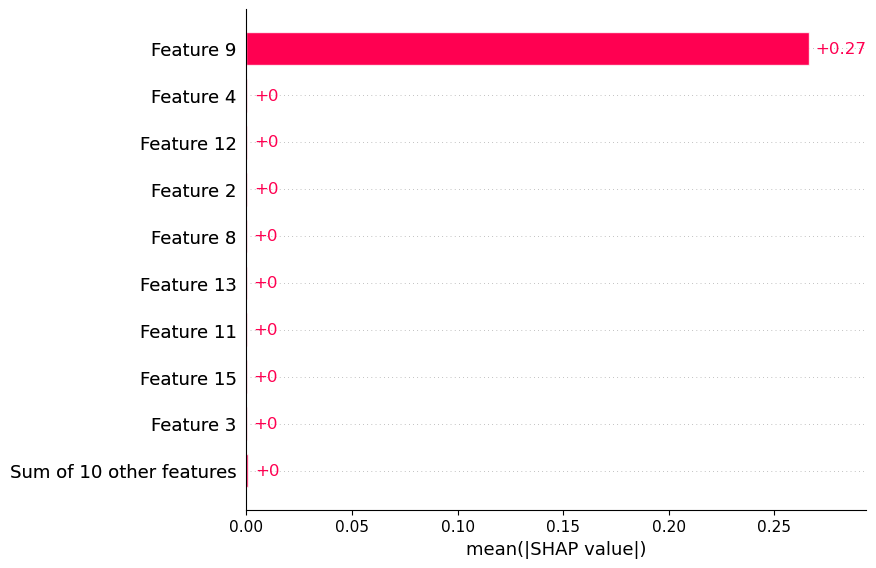

In [403]:
shap.plots.bar(shap_values)

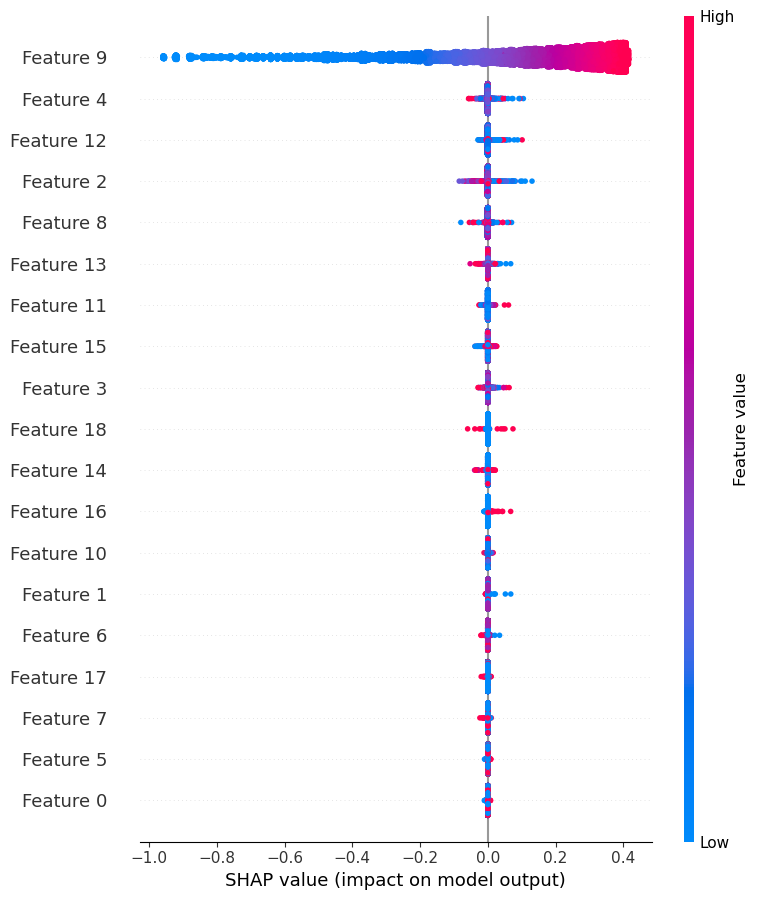

In [405]:
shap.summary_plot(shap_values)